# ***Human Activity Recognition System:***

---


# **1) Importing libraries:**

In [ ]:
import os
import glob
import random
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.image as img
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from wordcloud import WordCloud


# **2) Image Data collection and Data Loading:**

In [ ]:
train_file = pd.read_csv("/content/drive/MyDrive/datasets/Human Action Recognition/Training_set.csv")
test_file = pd.read_csv("/content/drive/MyDrive/datasets/Human Action Recognition/Testing_set.csv")

In [ ]:
train_images = glob.glob("/content/drive/MyDrive/datasets/Human Action Recognition/train/*")
test_images = glob.glob("/content/drive/MyDrive/datasets/Human Action Recognition/test/*")

In [ ]:
train_file

filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]

In [ ]:
train_file.filename.value_counts()


Image_1.jpg        1
Image_8393.jpg     1
Image_8395.jpg     1
Image_8396.jpg     1
Image_8397.jpg     1
                  ..
Image_4203.jpg     1
Image_4204.jpg     1
Image_4205.jpg     1
Image_4206.jpg     1
Image_12600.jpg    1
Name: filename, Length: 12600, dtype: int64

In [ ]:
train_file.label.value_counts()


sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [ ]:
test_file

filename
0        Image_1.jpg
1        Image_2.jpg
2        Image_3.jpg
3        Image_4.jpg
4        Image_5.jpg
...              ...
5395  Image_5396.jpg
5396  Image_5397.jpg
5397  Image_5398.jpg
5398  Image_5399.jpg
5399  Image_5400.jpg

[5400 rows x 1 columns]

In [ ]:
test_file.filename.value_counts()


Image_1.jpg       1
Image_3598.jpg    1
Image_3606.jpg    1
Image_3605.jpg    1
Image_3604.jpg    1
                 ..
Image_1799.jpg    1
Image_1798.jpg    1
Image_1797.jpg    1
Image_1796.jpg    1
Image_5400.jpg    1
Name: filename, Length: 5400, dtype: int64

# **3) Data Visualization and EDA:**

## **Distribution of Human Activities:**

In [ ]:
activity_labels = train_file.label.value_counts()
fig = px.pie(train_file, values=activity_labels.values, names=activity_labels.index, title='Distribution of Human Activities')
fig.update_layout(margin=dict(t=25, b=25, l=25, r=25))
fig.show()

In [ ]:
image_name = train_file['filename']
activity_name = train_file['label']

In [ ]:
image_name


0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

In [ ]:
activity_name


0                   sitting
1              using_laptop
2                   hugging
3                  sleeping
4              using_laptop
                ...        
12595               sitting
12596              clapping
12597               sitting
12598               dancing
12599    listening_to_music
Name: label, Length: 12600, dtype: object

## **Wordcloud of Activities:**

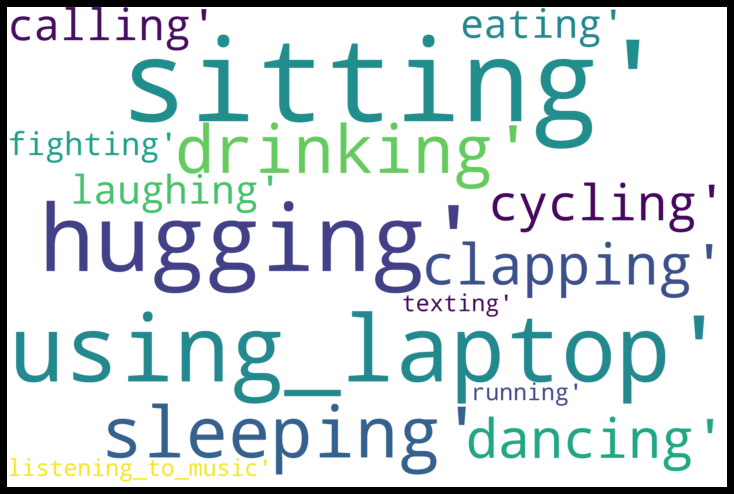

In [ ]:
activity_wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white').generate(str(activity_name.to_list()))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(activity_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

## **Display images with labels:**

In [ ]:
def display_images():
    random_num = random.randint(1,10000)
    img_to_display = "Image_{}.jpg".format(random_num)
    train_dir = "/content/drive/MyDrive/datasets/Human Action Recognition/train/"
    if os.path.exists(train_dir+img_to_display):
        random_image = img.imread(train_dir+img_to_display)
        plt.imshow(random_image)
        plt.title("{}".format(train_file.loc[train_file['filename'] == "{}".format(img_to_display), 'label'].item()))
    else:
        print("Image path not found \nSkipping the image!!")


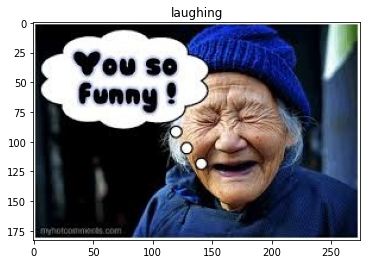

In [ ]:
display_images()

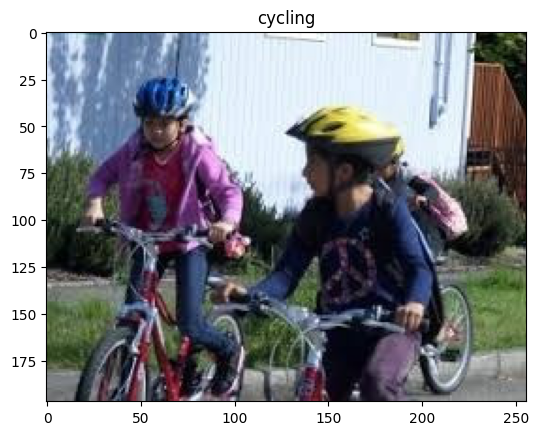

In [ ]:
display_images()

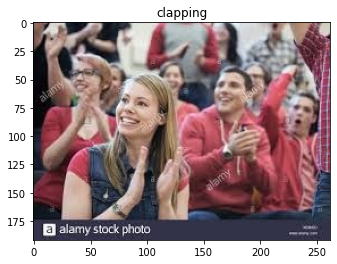

In [ ]:
display_images()

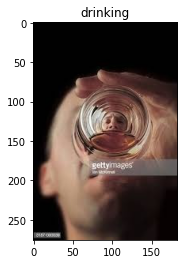

In [ ]:
display_images()

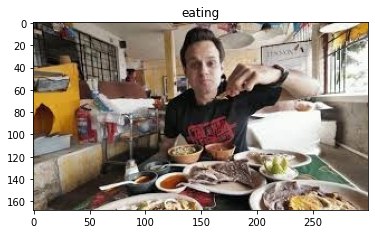

In [ ]:
display_images()

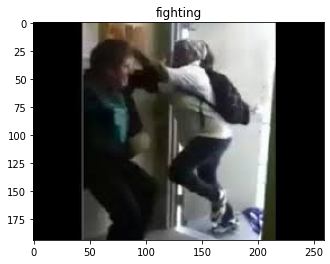

In [ ]:
display_images()

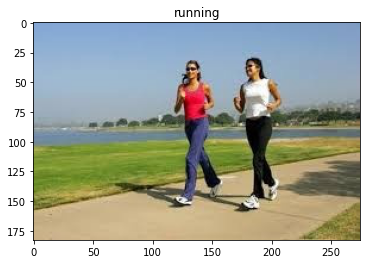

In [ ]:
display_images()

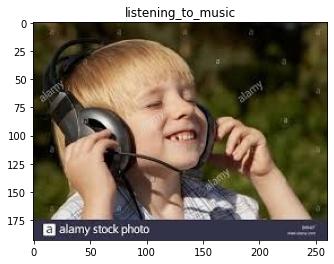

In [ ]:
display_images()

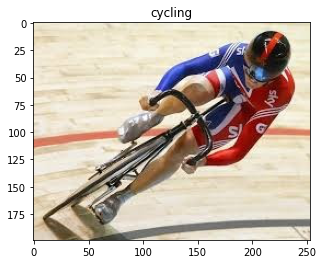

In [ ]:
display_images()

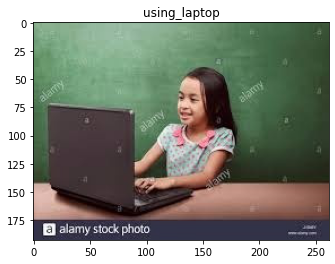

In [ ]:
display_images()

# **4) Preprocessing Image Data:**

In [ ]:
image_data = []
image_labels = []
count = 0
training_dir_length = len(train_images)
for i in (range(len(train_images)-1)):
    training_img_path = "/content/drive/MyDrive/datasets/Human Action Recognition/train/" + image_name[i]
    user_image = Image.open(training_img_path)
    image_data.append(np.asarray(user_image.resize((160,160))))
    image_labels.append(activity_name[i])
    print(count)
    count += 1


Streaming output truncated to the last 5000 lines.
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789

In [ ]:
image_labels[0]

'sitting'

In [ ]:
image_data[0]

array([[[234, 161,  89],
        [231, 164,  81],
        [217, 157,  83],
        ...,
        [ 39,   2,   0],
        [ 35,   0,   4],
        [ 34,   0,  11]],

       [[222, 159,  84],
        [222, 162,  83],
        [218, 165, 100],
        ...,
        [ 37,   3,   1],
        [ 33,   0,   1],
        [ 31,   0,   4]],

       [[223, 172,  98],
        [225, 177, 102],
        [228, 187, 132],
        ...,
        [ 33,   3,   3],
        [ 31,   1,   0],
        [ 30,   1,   0]],

       ...,

       [[108, 153, 196],
        [116, 163, 201],
        [116, 165, 206],
        ...,
        [196, 146, 111],
        [194, 144, 109],
        [193, 143, 108]],

       [[104, 149, 192],
        [111, 160, 196],
        [109, 161, 202],
        ...,
        [195, 145, 110],
        [194, 144, 109],
        [192, 142, 107]],

       [[106, 151, 195],
        [108, 157, 194],
        [101, 153, 194],
        ...,
        [195, 145, 110],
        [193, 143, 108],
        [192, 142, 107]]

## **Save image_data and image_labels to pickle files:**

In [ ]:
# Creating pickle file for image_data
with open("/content/drive/MyDrive/datasets/Human Action Recognition/train_image_data.pickle", "wb") as image_pickle_file:
     pickle.dump(image_data, image_pickle_file)

# Creating pickle file for image_labels
with open("/content/drive/MyDrive/datasets/Human Action Recognition/train_image_labels.pickle", "wb") as labels_pickle_file:
     pickle.dump(image_labels, labels_pickle_file)


## **Loading image_data and image_labels from pickle files:**

In [ ]:
# Loading pickle file for image_data
with open("/content/drive/MyDrive/datasets/Human Action Recognition/train_image_data.pickle", "rb") as image_data_pickled:
     image_data = pickle.load(image_data_pickled)

# Loading pickle file for image_labels
with open("/content/drive/MyDrive/datasets/Human Action Recognition/train_image_labels.pickle", "rb") as image_labels_pickled:
     image_labels = pickle.load(image_labels_pickled)


In [ ]:
image_data = np.asarray(image_data)
type(image_data)

numpy.ndarray

In [ ]:
image_data.shape

(12600, 160, 160, 3)

In [ ]:
image_labels[1]

'using_laptop'

## **Converting numpy image array to suitable form:**

In [ ]:
y_train = to_categorical(np.asarray(train_file['label'].factorize()[0]))
print(y_train[0])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(y_train[15])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(y_train[24])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# **5) Building & Training Model:**

# **5(a): CNN Model 1 (VGG16):**

In [ ]:
# using pretrained model
vgg16_pretrained = tf.keras.applications.VGG16(include_top=False, input_shape=(160,160,3), pooling='avg',classes=15,
                   weights='imagenet')


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Building VGG16 model

vgg = Sequential()
for layer in vgg16_pretrained.layers:
  layer.trainable=False
vgg.add(vgg16_pretrained)
vgg.add(Flatten())
vgg.add(Dense(512, activation='relu'))
vgg.add(Dense(15, activation='softmax'))


In [ ]:
vgg.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
vgg.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14,985,039
Trainable params: 270,351
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = vgg.fit(image_data, y_train, epochs=50)


Epoch 1/50
394/394 [==============================] - 38s 69ms/step - loss: 2.1520 - accuracy: 0.4542
Epoch 2/50
394/394 [==============================] - 26s 67ms/step - loss: 1.2194 - accuracy: 0.6070
Epoch 3/50
394/394 [==============================] - 27s 69ms/step - loss: 0.9683 - accuracy: 0.6858
Epoch 4/50
394/394 [==============================] - 27s 67ms/step - loss: 0.7577 - accuracy: 0.7493
Epoch 5/50
394/394 [==============================] - 27s 68ms/step - loss: 0.5761 - accuracy: 0.8140
Epoch 6/50
394/394 [==============================] - 27s 68ms/step - loss: 0.4140 - accuracy: 0.8653
Epoch 7/50
394/394 [==============================] - 27s 69ms/step - loss: 0.3004 - accuracy: 0.9025
Epoch 8/50
394/394 [==============================] - 27s 68ms/step - loss: 0.2297 - accuracy: 0.9246
Epoch 9/50
394/394 [==============================] - 27s 68ms/step - loss: 0.1699 - accuracy: 0.9470
Epoch 10/50
394/394 [==============================] - 27s 68ms/step - loss: 0.141

## **Save VGG16 Model to HDF5 file:**

In [ ]:
# Saving VGG16 model
vgg.save("/content/drive/MyDrive/datasets/Human Action Recognition/vgg_human_activity_model.h5")


## **Loading saved VGG16 Model from HDF5 file:**

In [ ]:
# loading saved VGG16 model
hdf5_vgg_model = "/content/drive/MyDrive/datasets/Human Action Recognition/vgg_human_activity_model.h5"

vgg = tf.keras.models.load_model(hdf5_vgg_model, compile=True)

## **VGG16 model Summary:**

In [ ]:
vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14,985,039
Trainable params: 270,351
Non-trainable params: 14,714,688
_________________________________________________________________


## **Plotting loss for VGG16 Model:**

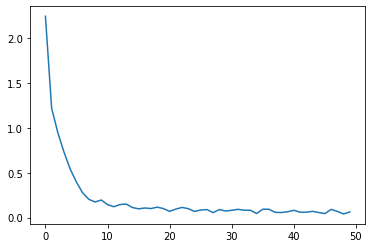

In [ ]:
vgg_loss = history.history['loss']
plt.plot(vgg_loss)

## **Plotting accuracy for VGG16 Model:**

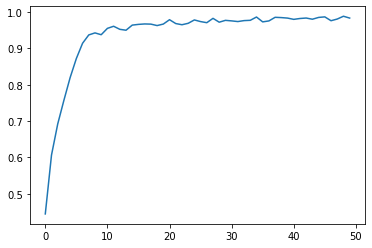

In [ ]:
vgg_accuracy = history.history['accuracy']
plt.plot(vgg_accuracy)

# **5(b): CNN Model 2:**

In [ ]:
# Building CNN model_2

cnn_model_2 = Sequential()

cnn_model_2.add(Conv2D(kernel_size=3, filters=32, activation="relu", input_shape=(160, 160, 3)))

cnn_model_2.add(MaxPooling2D(strides=2, pool_size=2))

cnn_model_2.add(Conv2D(kernel_size=3, filters=32, activation="relu"))

cnn_model_2.add(MaxPooling2D(strides=2, pool_size=2))

cnn_model_2.add(Flatten())


In [ ]:
cnn_model_2.add(Dense(activation="relu", units=512))

cnn_model_2.add(Dense(activation="sigmoid", units=15))


In [ ]:
cnn_model_2.compile(optimizer="adam", metrics=["accuracy"], loss="categorical_crossentropy")

In [ ]:
cnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 77, 77, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 46208)             0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [ ]:
history_2 = cnn_model_2.fit(image_data, y_train, epochs=50)

Epoch 1/50
394/394 [==============================] - 20s 21ms/step - loss: 56.2564 - accuracy: 0.0808
Epoch 2/50
394/394 [==============================] - 8s 21ms/step - loss: 2.5588 - accuracy: 0.1410
Epoch 3/50
394/394 [==============================] - 10s 24ms/step - loss: 2.2466 - accuracy: 0.2563
Epoch 4/50
394/394 [==============================] - 9s 22ms/step - loss: 1.8184 - accuracy: 0.4040
Epoch 5/50
394/394 [==============================] - 8s 21ms/step - loss: 1.4184 - accuracy: 0.5441
Epoch 6/50
394/394 [==============================] - 8s 21ms/step - loss: 1.1516 - accuracy: 0.6431
Epoch 7/50
394/394 [==============================] - 8s 20ms/step - loss: 0.9731 - accuracy: 0.7079
Epoch 8/50
394/394 [==============================] - 8s 21ms/step - loss: 0.8286 - accuracy: 0.7529
Epoch 9/50
394/394 [==============================] - 8s 20ms/step - loss: 0.7053 - accuracy: 0.7901
Epoch 10/50
394/394 [==============================] - 8s 21ms/step - loss: 0.6346 - acc

## **Save CNN Model_2 to HDF5 file:**

In [ ]:
# Saving CNN model_2

cnn_model_2.save("/content/drive/MyDrive/datasets/Human Action Recognition/cnn_model2_human_activity_model.h5")


## **Loading saved CNN Model_2 from HDF5 file:**

In [ ]:
# loading saved CNN model_2
hdf5_cnn_model_2 = "/content/drive/MyDrive/datasets/Human Action Recognition/cnn_model2_human_activity_model.h5"

cnn_model_2 = tf.keras.models.load_model(hdf5_cnn_model_2, compile=True)


## **CNN Model_2 Summary:**

In [ ]:
cnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 77, 77, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 46208)             0         
                                                                 
 dense_2 (Dense)             (None, 512)              

## **Plotting loss for CNN Model_2:**

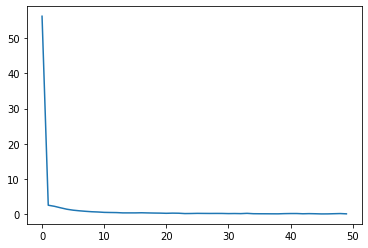

In [ ]:
cnn_model_2_loss = history_2.history['loss']
plt.plot(cnn_model_2_loss)

## **Plotting accuracy for CNN Model_2:**

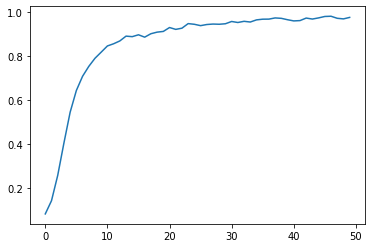

In [ ]:
cnn_model_2_accuracy = history_2.history['accuracy']
plt.plot(cnn_model_2_accuracy)

# **6) Testing VGG16 model on random images:**

In [ ]:
labels = activity_name.value_counts().index.tolist()

In [ ]:
# Reading images as numpy array:
from PIL import Image

def convert_image_to_array(img):
    image = Image.open(img)
    return np.asarray(image.resize((160,160)))

In [ ]:
# predict human activities for random images:

def predict_human_activities(image_path):
    model_result = vgg.predict(np.asarray([convert_image_to_array(image_path)]))
    item_index = np.where(model_result==np.max(model_result))
    predicted_activity_class = item_index[1][0]
    print("Probability: " + str(np.max(model_result)*100) + "%\nPredicted Activity Class : ", predicted_activity_class)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(labels[predicted_activity_class])


1/1 [==============================] - 9s 9s/step
Probability: 99.99996423721313%
Predicted Activity Class :  10


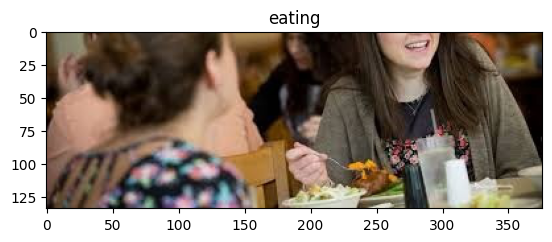

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_4.jpg')


1/1 [==============================] - 0s 22ms/step
Probability: 99.99946355819702%
Predicted Activity Class :  5


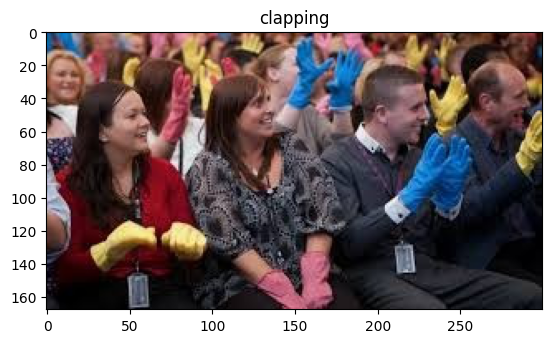

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_6.jpg')


1/1 [==============================] - 0s 22ms/step
Probability: 99.9982237815857%
Predicted Activity Class :  0


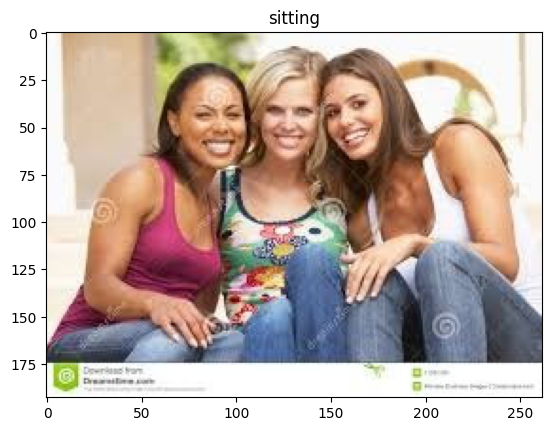

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_8.jpg')


1/1 [==============================] - 0s 19ms/step
Probability: 100.0%
Predicted Activity Class :  4


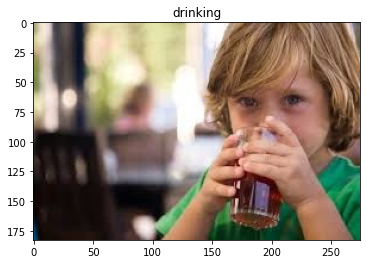

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_10.jpg')


1/1 [==============================] - 0s 20ms/step
Probability: 99.99896287918091%
Predicted Activity Class :  12


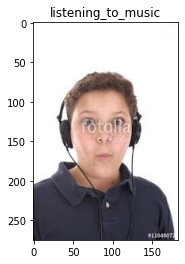

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_11.jpg')


1/1 [==============================] - 0s 30ms/step
Probability: 99.99992847442627%
Predicted Activity Class :  6


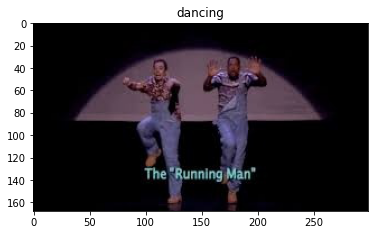

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_20.jpg')


1/1 [==============================] - 0s 24ms/step
Probability: 100.0%
Predicted Activity Class :  13


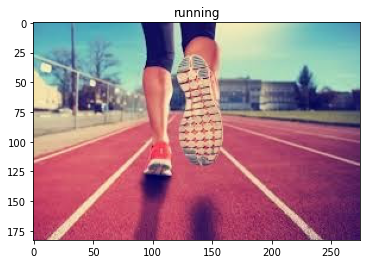

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_22.jpg')


1/1 [==============================] - 0s 20ms/step
Probability: 100.0%
Predicted Activity Class :  11


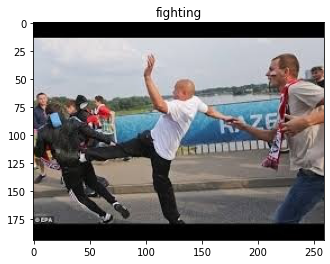

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_25.jpg')


1/1 [==============================] - 0s 23ms/step
Probability: 99.97345805168152%
Predicted Activity Class :  2


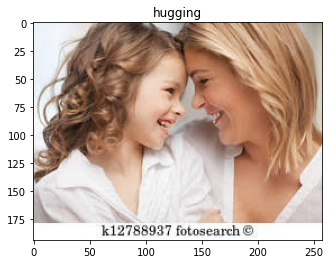

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_27.jpg')


1/1 [==============================] - 0s 35ms/step
Probability: 100.0%
Predicted Activity Class :  3


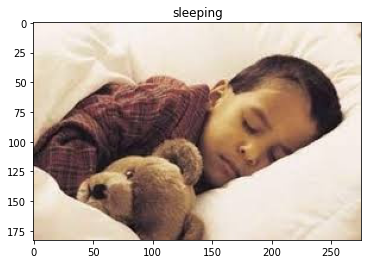

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_29.jpg')


1/1 [==============================] - 0s 20ms/step
Probability: 99.99995231628418%
Predicted Activity Class :  9


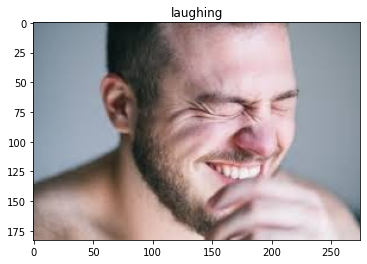

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_30.jpg')


1/1 [==============================] - 0s 21ms/step
Probability: 100.0%
Predicted Activity Class :  7


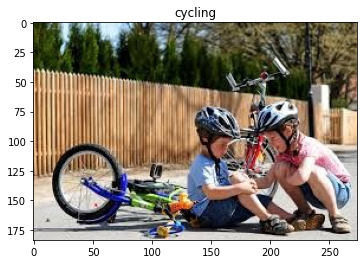

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_37.jpg')


1/1 [==============================] - 0s 21ms/step
Probability: 100.0%
Predicted Activity Class :  10


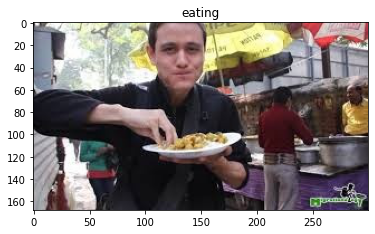

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_44.jpg')

1/1 [==============================] - 0s 27ms/step
Probability: 99.82763528823853%
Predicted Activity Class :  8


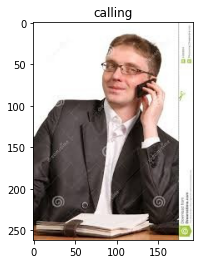

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/test/Image_1065.jpg')


# **7) Capture real time user's image and predict the activity:**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='/content/drive/MyDrive/datasets/Human Action Recognition/user_photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image as display_image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(display_image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 22ms/step
Probability: 32.26538598537445%
Predicted Activity Class :  5


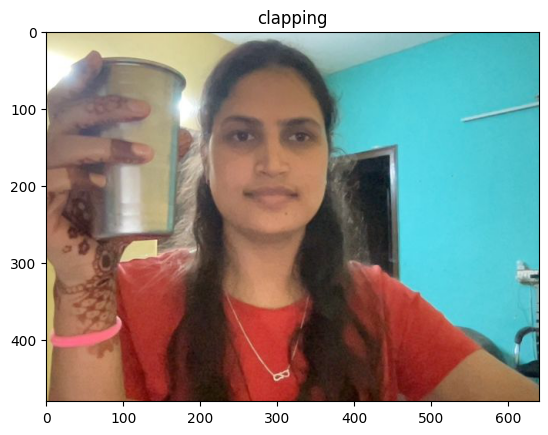

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/user_photo.jpg')


1/1 [==============================] - 0s 23ms/step
Probability: 100.0%
Predicted Activity Class :  1


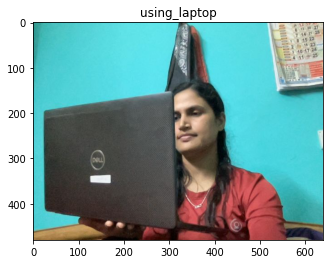

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/user_photo.jpg')


1/1 [==============================] - 0s 24ms/step
Probability: 58.03687572479248%
Predicted Activity Class :  9


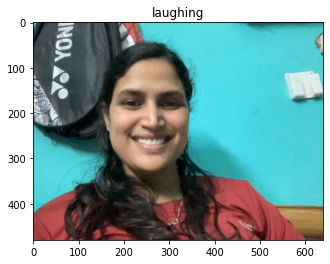

In [ ]:
predict_human_activities('/content/drive/MyDrive/datasets/Human Action Recognition/user_photo.jpg')
